In [260]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.misc import imread, imresize, imshow
import cv2
import os
import time
from hashlib import md5
import scipy

In [261]:
IMAGE_DIR = '/home/rishabh/projects/search/visual_search_data'

os.chdir(IMAGE_DIR)
os.getcwd()

'/home/rishabh/projects/search/visual_search_data'

In [262]:
image_files = os.listdir()
print(len(image_files))

20


In [263]:
image_files[1]

'sa1.jpg'

In [264]:
imread(image_files[1]).shape

/home/rishabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(1040, 992, 3)

In [265]:
def filter_images(images):
    image_list = []
    for image in images:
        try:
            assert imread(image).shape[2] == 3
            image_list.append(image)
        except  AssertionError as e:
            print(e)
    return image_list

In [266]:
def img_gray(image):
    image = imread(image)
    return np.average(image, weights=[0.299, 0.587, 0.114], axis=2)

In [267]:
def resize(image, height=30, width=30):
    row_res = cv2.resize(image,(height, width), interpolation = cv2.INTER_AREA).flatten()
    col_res = cv2.resize(image,(height, width), interpolation = cv2.INTER_AREA).flatten('F')
    return row_res, col_res

In [268]:
def intensity_diff(row_res, col_res):
    difference_row = np.diff(row_res)
    difference_col = np.diff(col_res)
    difference_row = difference_row > 0
    difference_col = difference_col > 0
    return np.vstack((difference_row, difference_col)).flatten()
    #return difference_row

In [269]:
def file_hash(array):
    return md5(array).hexdigest()

In [270]:
def difference_score(image, height = 50, width = 50):
    gray = img_gray(image)
    row_res, col_res = resize(gray, height, width)
    difference = intensity_diff(row_res, col_res)
    
    return difference

In [271]:
def difference_score_dict_hash(image_list):
    ds_dict = {}
    duplicates = []
    hash_ds = []
    for image in image_list:
        ds = difference_score(image)
        hash_ds.append(ds)
        filehash = md5(ds).hexdigest()
        if filehash not in ds_dict:
            ds_dict[filehash] = image
        else:
            duplicates.append((image, ds_dict[filehash]) )
    
    return  duplicates, ds_dict, hash_ds

In [272]:
image_files = filter_images(image_files)
duplicates, ds_dict, hash_ds =difference_score_dict_hash(image_files)

/home/rishabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/home/rishabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [273]:
len(duplicates)

1

/home/rishabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/home/rishabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


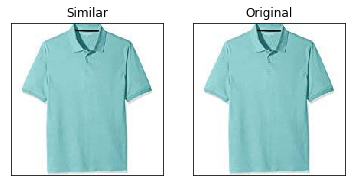

In [274]:

for file_names in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread(file_names[0]))
        plt.title('Similar'), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(file_names[1]))
        plt.title('Original'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [275]:
def hamming_distance(image, image2):
    score =scipy.spatial.distance.hamming(image, image2)
    return score

In [276]:
def difference_score_dict(image_list):
    ds_dict = {}
    duplicates = []
    for image in image_list:
        ds = difference_score(image)
        
        if image not in ds_dict:
            ds_dict[image] = ds
        else:
            duplicates.append((image, ds_dict[image]) )
    
    return  duplicates, ds_dict

In [277]:
image_files = filter_images(image_files)
duplicates, ds_dict =difference_score_dict(image_files)

/home/rishabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/home/rishabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [278]:
len(duplicates)

0

In [279]:
len(ds_dict.keys())

20

In [280]:
import itertools
for k1,k2 in itertools.combinations(ds_dict, 2):
    if hamming_distance(ds_dict[k1], ds_dict[k2])< .30:
        duplicates.append((k1,k2))

In [281]:
len(duplicates)

2

/home/rishabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/home/rishabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


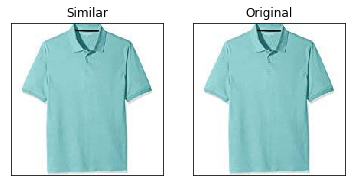

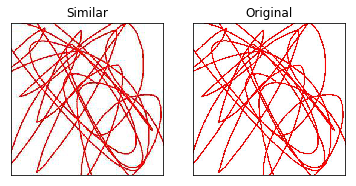

In [282]:

for file_names in duplicates[:len(duplicates)]:
    try:
    
        plt.subplot(121),plt.imshow(imread(file_names[0]))
        plt.title('Similar'), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(file_names[1]))
        plt.title('Original'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue